# General

The spatially-adaptive-combi framework aims at providing a generalized interface for calculating the Combination Technique with spatial adaptive strategies.

Currently this is restricted to the calculation of an integral over a function $f$:

$$\int_{x \in D} f(x) dx$$

where $x$ is an d-dimensional vector and D is the d-dimensional Domain which is defined by the lower bound $a$ and the upper bound $b$. Usually one defines $D=[0,1]^d$ but other rectangular domains are also possible.

# Functions

So let's first look at the pre-defined functions that we can use in the framework. All implemented funcitons can be found in Functions.py and they typically offer the functionality to evaluate the function at a certain point and to return the analytic integral value for a specified domain. Furthermore plotting a function is already available directly in the framework. So let's try one of the functions namely $GenzCornerPeak$.

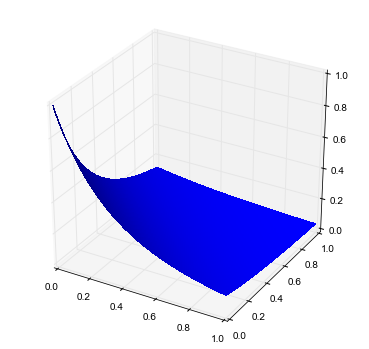

The function value at (0,0.5) is 0.2962962962962963
The analytical integral value in the Domain [0,1]^d is 0.16666666666666663


In [13]:
%matplotlib inline
from Function import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = 0
b = 1
f = GenzCornerPeak(coeffs=coeffs)
f.plot(np.ones(dim)*a, np.ones(dim)*b)
print("The function value at (0,0.5) is", f.eval((0,0.5)))
print("The analytical integral value in the Domain [0,1]^d is", 
      f.getAnalyticSolutionIntegral(np.zeros(dim), np.ones(dim)))

There are many more functions pre-defined in Function.py. It is also possible to compose functions and create combined and scaled functions.

# Standard Combination Technique

So now let's first look at the Truncated Combination Technique with a predefined maximum und minimum level and let's integrate the GenzCornerPeak from before with it. For this purpose we also have to select a grid on which we want to perform the combi. We will use here the equidistant Trapezoidal grid that applies the trapezoidal rule to integrate the function. There are more grids available such as Leja, Clenshaw-Curtis, Gauss-Legendre...

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution 0.166628181093
Analytic Solution 0.166666666667
Difference 3.84855732446e-05


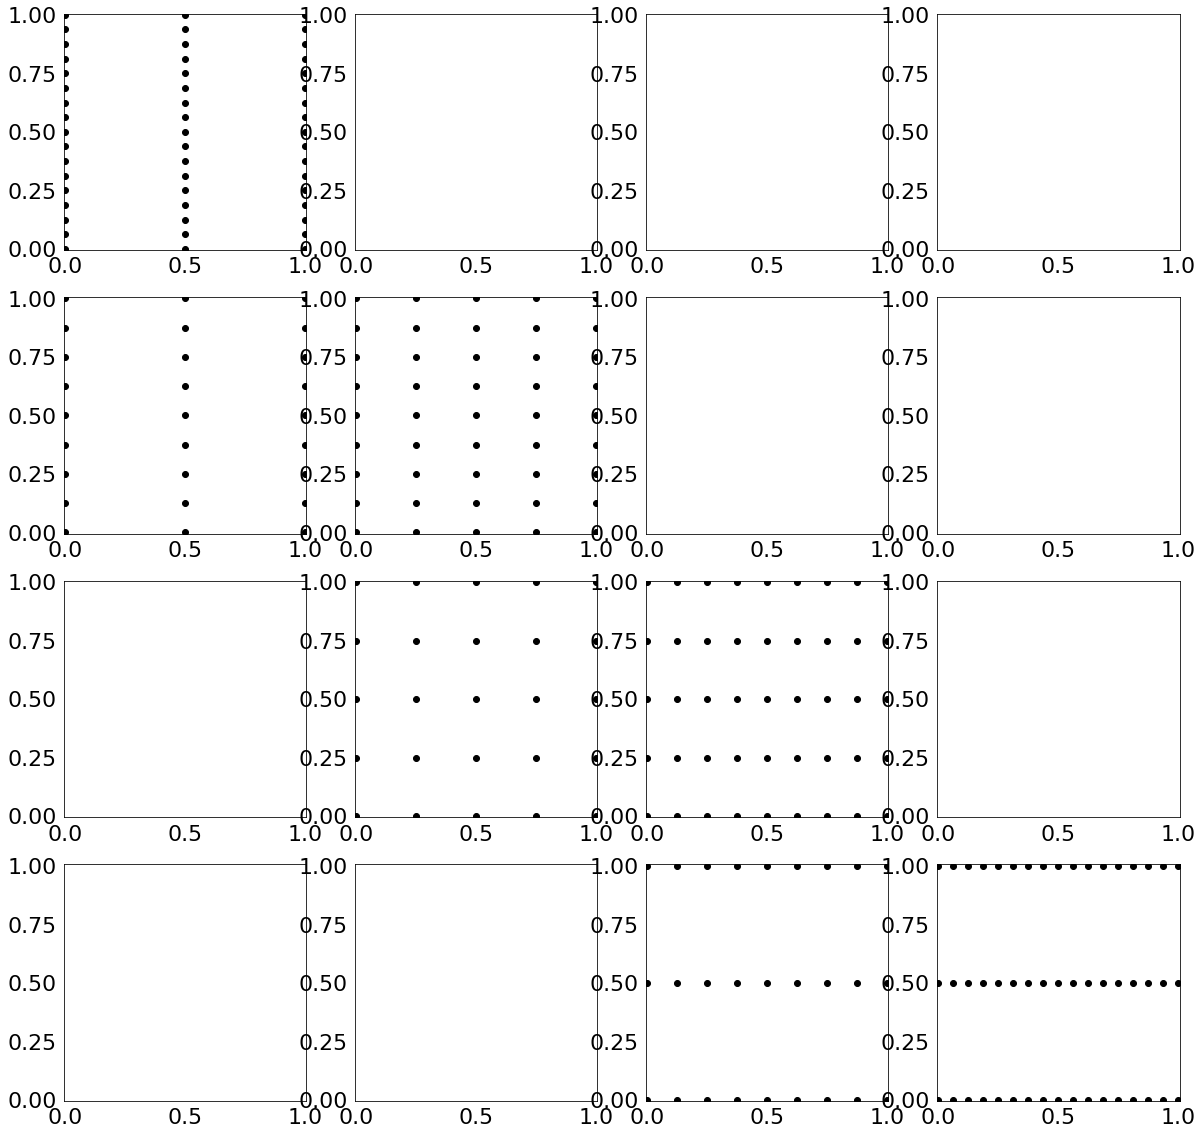

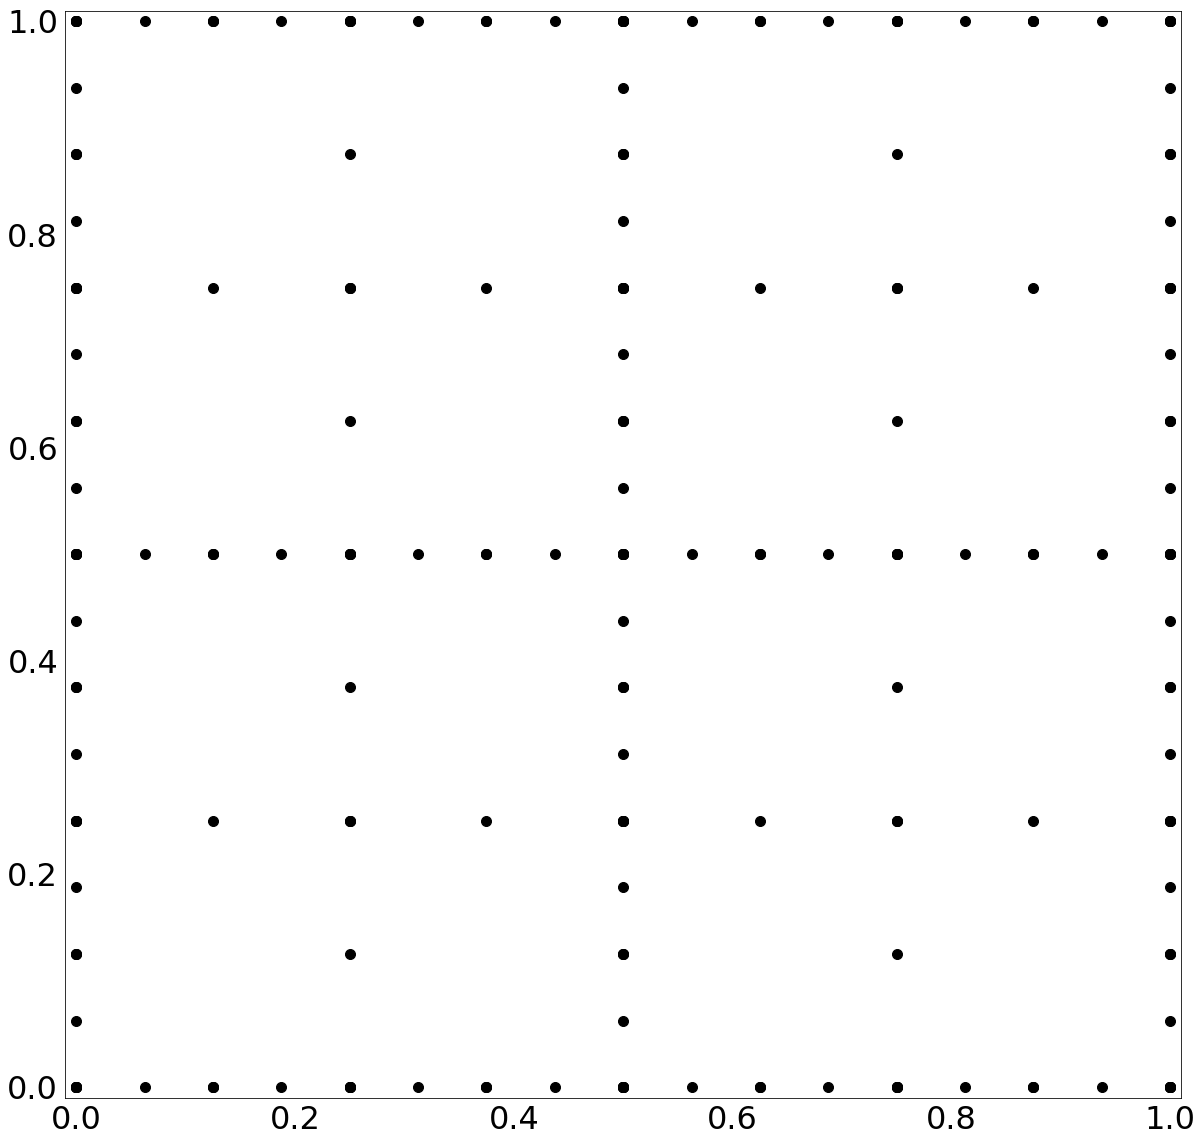

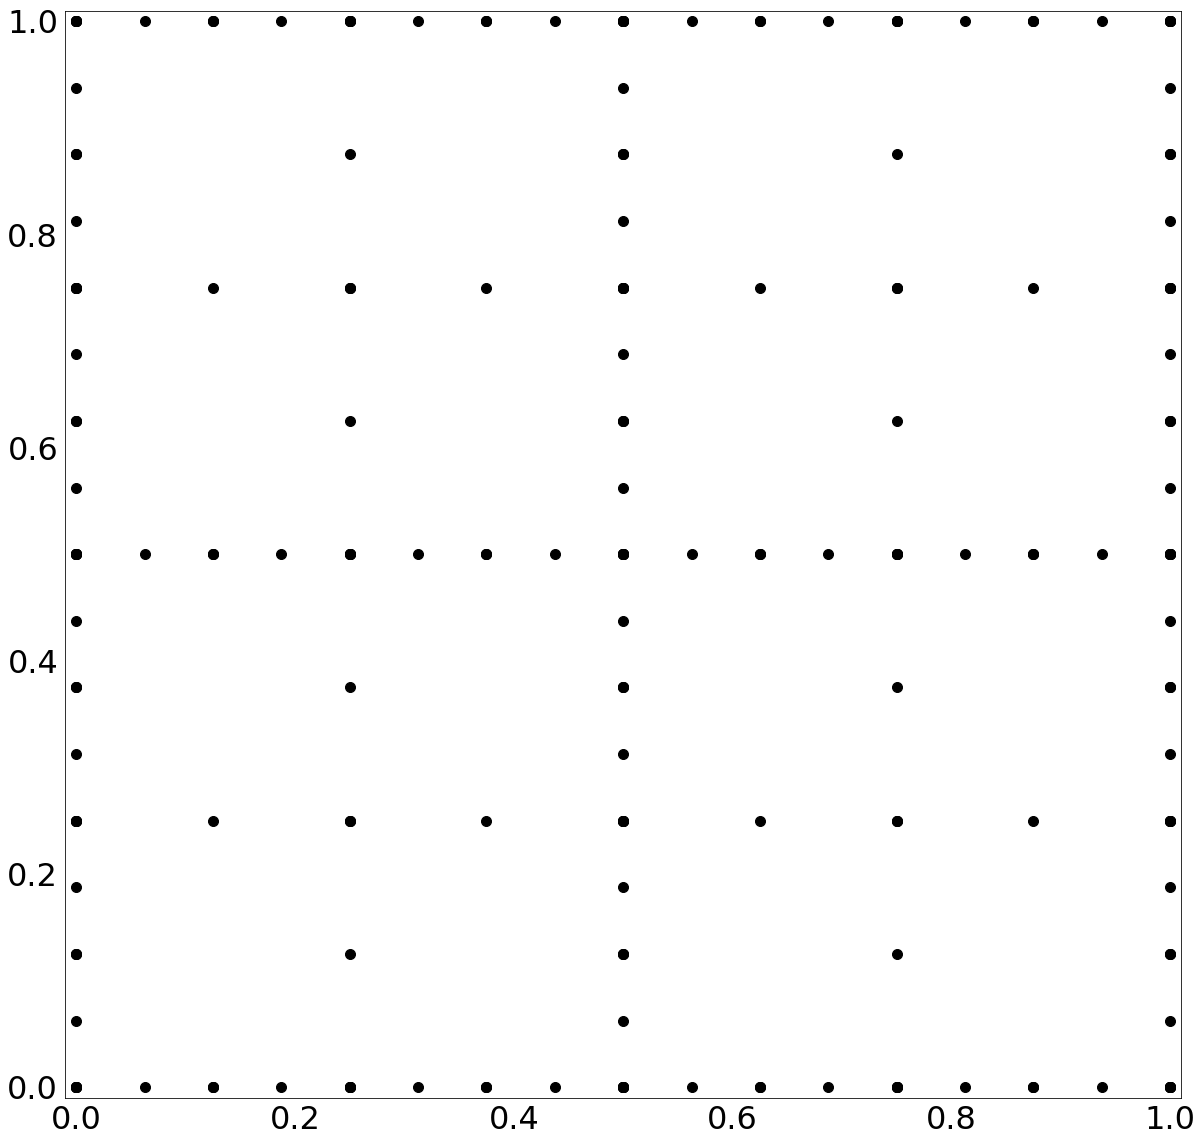

In [2]:
%matplotlib inline
from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a, b)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = StandardCombi(a, b, grid)
minimum_level = 1
maximum_level = 4
combi_integral = combiObject.perform_combi(minimum_level, maximum_level, f)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


The output shows for the combination Scheme that is used which defines the level vectors and the coefficients of the grids. Then the solution of the combination integral is listed followed by the analytic solution and the absolute error. Finally the graphical plot of the combination scheme and the resulting sparse grid is shown.

# Dimension Adaptive Combination Technique

An often used variant of the Standard Combination Technique is the dimension adaptive Combination Technique. An implementation which applies this method is now available within the framework. It is called similarly to the Standard Combination Technique but now we also have to define a tolerance to indicate how long we want to adapt the scheme. The adaptation stops once the relative error of the integration falls below this tolerance threshold.

[(1, 4), (2, 3), (3, 2), (4, 1)]
[(1, 3), (2, 2), (3, 1)]
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [2, 3] 1
5 [4, 1] 1
6 [1, 4] 1
[ 0.0006847   0.          0.          0.          0.0006847   0.00186827
  0.00186827]
Current error: 0.000230913439468
Refining ((4, 1), 1) True
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [1, 4] 1
5 [2, 3] 1
6 [5, 1] 1
[ 0.0006847   0.          0.          0.          0.00186827  0.0006847
  0.00094768]
Current error: 0.00169168349915
Refining ((1, 4), 1) True
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [1, 5] 1
5 [2, 3] 1
6 [5, 1] 1
[ 0.0006847   0.          0.          0.          0.00094768  0.0006847
  0.00094768]
Current error: 0.00315245355884
Refining ((1, 5), 1) True
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [2, 3] 1
5 [1, 6] 1
6 [5, 1] 1
[ 0.0006847   0.          0.          0.          0.0006847   0.00047926
  0.00094768]
Current error: 0.00351803517475
Refining ((5, 1), 1) True
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3]

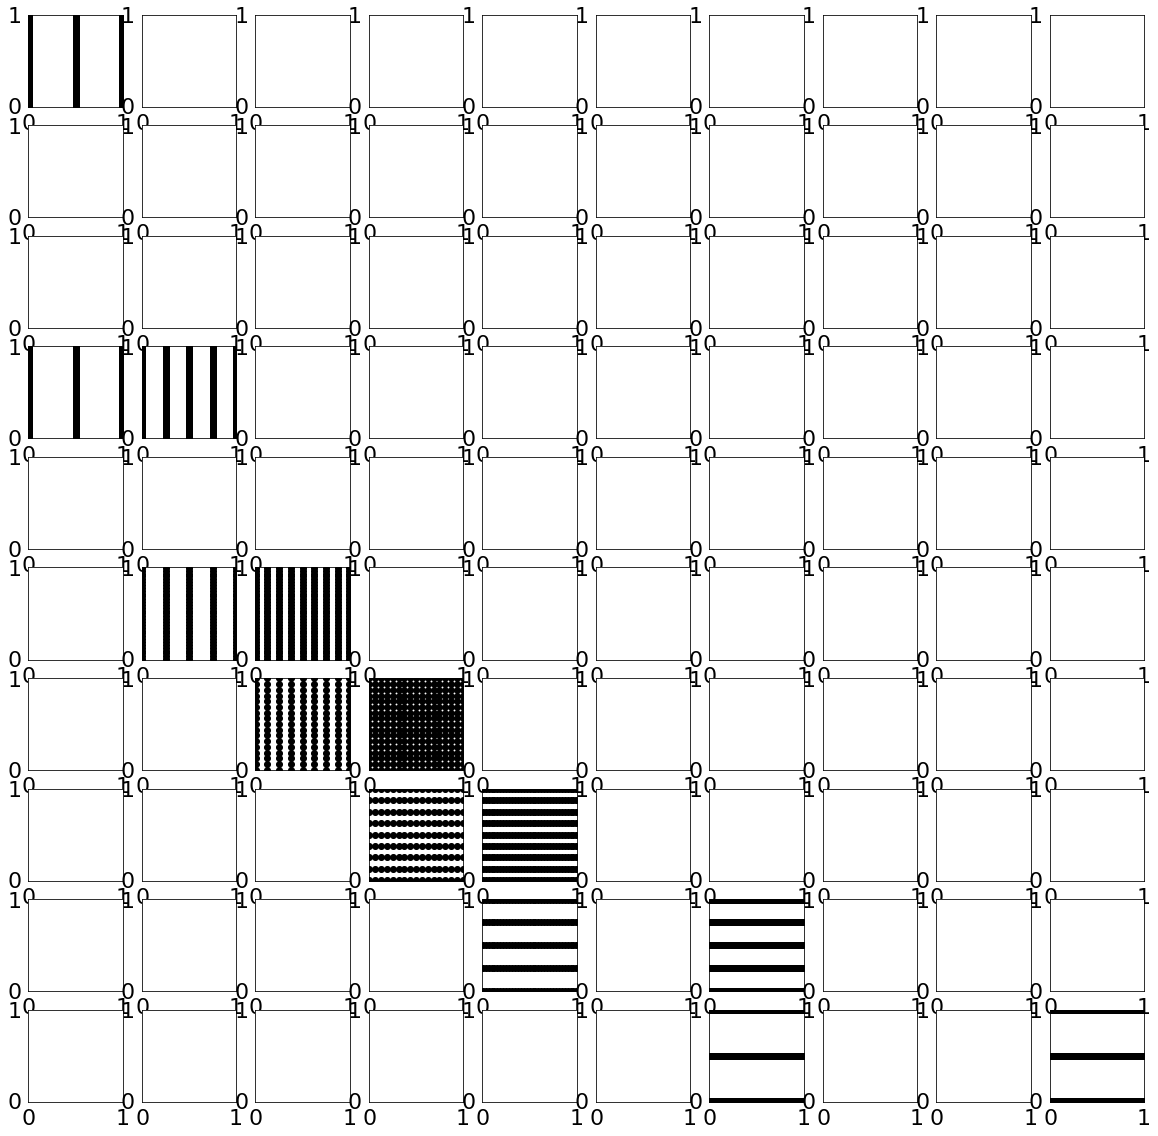

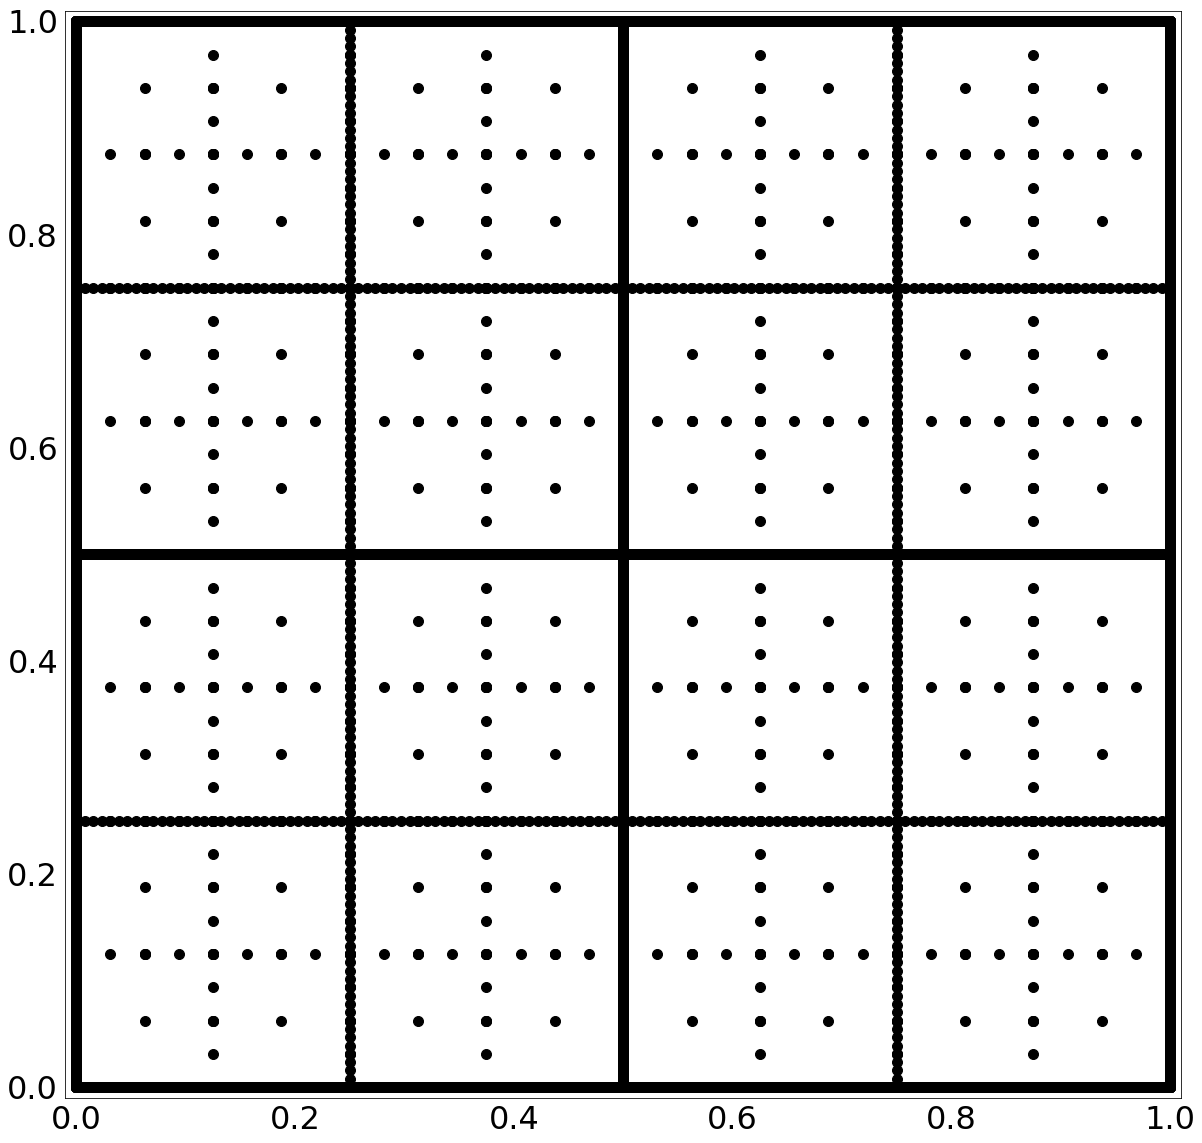

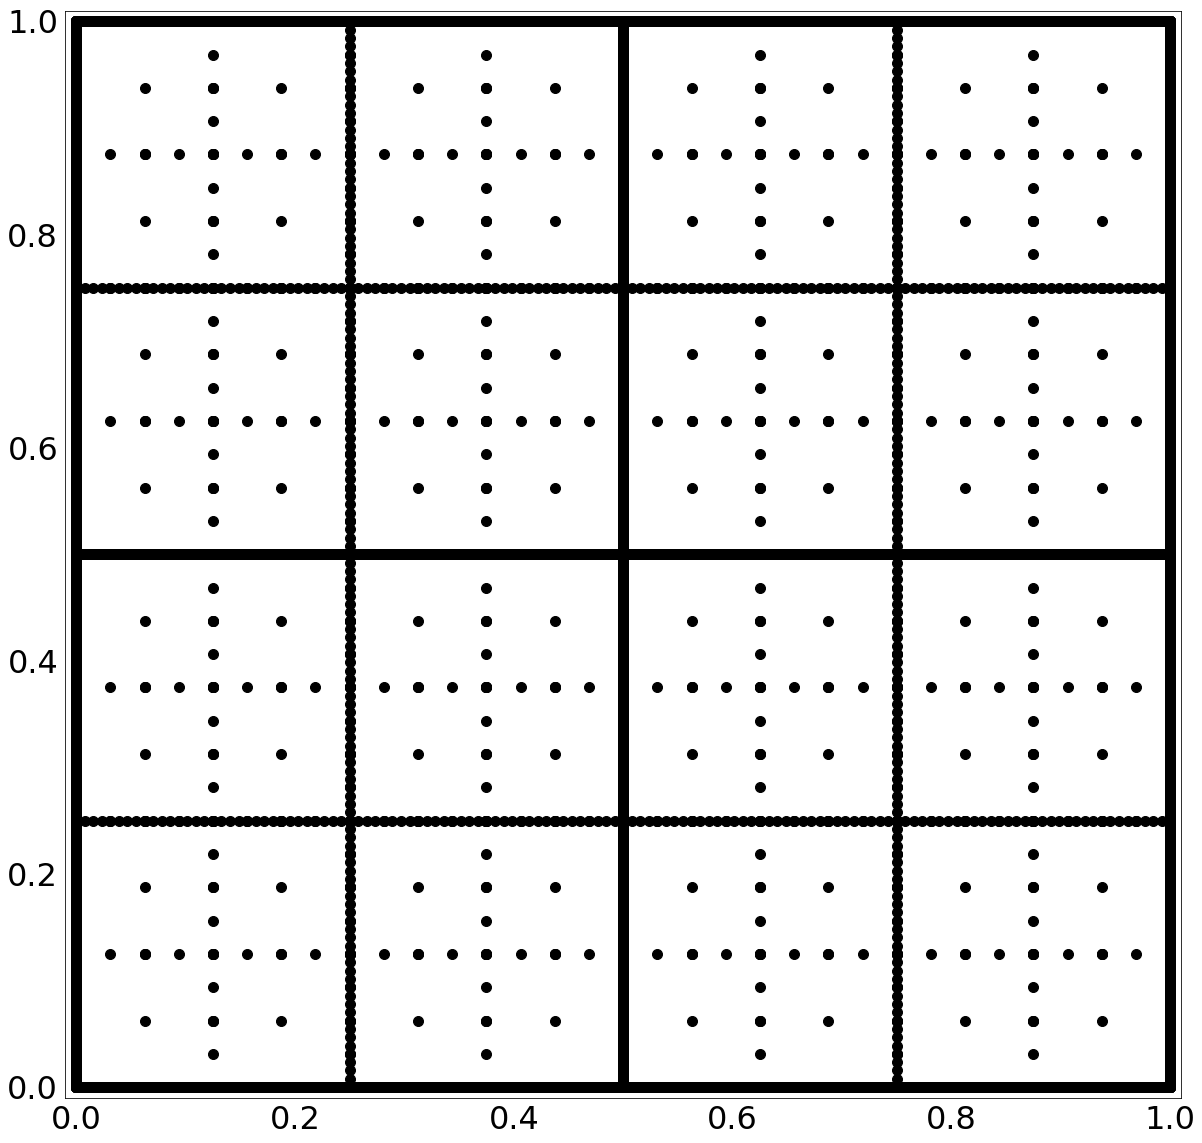

In [1]:
%matplotlib inline
from Function import *
from DimAdaptiveCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a, b)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = DimAdaptiveCombi(a, b, grid)
minimum_level = 1
maximum_level = 4
combi_integral = combiObject.perform_combi(minimum_level, maximum_level, f, 10**-4)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()